<a href="https://colab.research.google.com/github/k-chiou/InsultDetector/blob/master/Insult_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab

WordライクなGoogle Docs、ExcelライクなSpreadsheetといった、クラウドアプリケーションのPython/ 機械学習版で、Pythonのソースコードを対話型で実行できるだけでなく、前に挙げたアプリケーション同様、作ったものを共有したり、共同編集したりすることができます。

■メリット：

・環境構築不要

・GPU NVIDIA Tesla K80 12GB (80万円程度、処理速度はCPUの数十倍)を無料で使える！

■デメリット：

・一定時間（一時間以内）に無操作であれば、接続が切断される

・アイドル状態が90分続くと停止→変数などがクリアされる（退避策：Auto Refresh）

・連続使用は最大12時間（退避策：トレーニング中のモデルをDriveに保存して、再起動後トレーニング再開）

ref: https://qiita.com/tomo_makes/items/b3c60b10f7b25a0a5935

# Insult Detecter
侮蔑（ぶべつ）検出器

https://www.kaggle.com/c/detecting-insults-in-social-commentary


---



Kaggleとは？

まず呼び方ですが、Kaggleと書いて「カグル」と読みます。日本でも最近は定着してきましたが、Kaggleに参加している方を「カグラー（Kaggler）」とも呼びます。

Kaggleですが、本サイトへ行くと一番上に書かれていますが「The Home of Data Science & Machine Learning」（データサイエンスと機械学習の家）と題されている通り、世界中の機械学習・データサイエンスに携わっている約40万人の方が集まるコミニティーです。

Kaggleでは、企業や政府などの組織とデータ分析のプロであるデータサイエンティスト/機械学習エンジニアを繋げるプラットフォームとなっています。単純なマッチングではなく、Kaggleの最大の目玉とも言える「Competetion（コンペ）」がKaggleの特徴の一つです。

Competition（コンペ）は、企業や政府がコンペ形式（競争形式）で課題を提示し、賞金と引き換えに最も制度の高い分析モデルを買い取るという、最近でいう一種のクラウドファンディングに近いような仕組みとなります。

ref: https://www.codexa.net/what-is-kaggle/

⇒

・企業には、データサイエンスの問題を解決できる

・データサイエンティストには、大量の学習データをただで利用し、賞金をもらえる

## ⓪学習Dataのインポート

### By Google Drive

In [0]:
# Google Driveと連携
from google.colab import drive
drive.mount('/content/drive/')

In [0]:
!ls /content/drive/'My Drive'

### By Downloading
Kaggelからダウンロードするため、ログイン（Cookie?）要りそう

In [0]:
#!wget https://www.kaggle.com/c/detecting-insults-in-social-commentary/download/train.csv
#!wget https://www.kaggle.com/c/detecting-insults-in-social-commentary/download/test_with_solutions.csv
#!ls

In [0]:
!wget https://github.com/k-chiou/InsultDetector/blob/master/test_with_solutions.csv
!wget https://github.com/k-chiou/InsultDetector/blob/master/train.csv
!ls

### By Uploading

In [0]:
from google.colab import files
uploaded = files.upload()

### By Cloning from Git

In [0]:
!git clone https://github.com/k-chiou/InsultDetector.git
!ls InsultDetector

Cloning into 'InsultDetector'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.
Insult_Detector.ipynb  README.md  test_with_solutions.csv  train.csv


## ①Data処理

In [0]:
import pandas as pd
import os
#path = "/content/drive/My Drive/Colab Notebooks/insult" # Google Driveと連携する場合
#path = "." # wgetの場合
path = "InsultDetector" # cloneの場合
data = pd.read_csv(os.path.join(path, 'train.csv')) # os.path.joinの役割 = path + "/" + filename
data_test = pd.read_csv(os.path.join(path, 'test_with_solutions.csv'))

In [0]:
data.head(5) # 先頭n行のデータを表示。nは省略可（デフォルト:n=5）。

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [0]:
# Dateデータが判断の基準にならないはず→削除
data.drop('Date', axis=1, inplace=True) # axis = 0: 行/　axis = 1: 列。 inplace: 対象をそのまま取り替えるか
#data = data.drop('Date', axis=1, inplace=False)

In [0]:
data.head(5)

,Insult,Comment
0,1,"""You fuck your dad."""
1,0,"""i really don't understand your point.\xa0 It ..."
2,0,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,"""listen if you dont wanna get married to a man..."
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [0]:
# Check the equalization of shapes of input(X) and output(Y) data
# pandasデータのcolumn要素の扱い：①data['column名']　②data.column名
print("Shape of Comment: {}".format(data['Comment'].shape))
print("Shape of Insult: {}".format(data.Insult.shape))

Shape of Comment: (3947,)
Shape of Insult: (3947,)


In [0]:
# 数学計算のため、nullデータは無理
# Check if there is any null in data
print("Shape of Comment with null: {}".format(data.Comment[data.Comment.isnull()].shape))
print("Shape of Insult with null: {}".format(data.Insult[data.Insult.isnull()].shape))
# もしあれば、便宜上、削除する/（数値の場合）全データの平均値に取り替える

Shape of Comment with null: (0,)
Shape of Insult with null: (0,)


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3947 entries, 0 to 3946
Data columns (total 2 columns):
Insult     3947 non-null int64
Comment    3947 non-null object
dtypes: int64(1), object(1)
memory usage: 61.8+ KB


文字ってどうやって数学計算するの？

[定量化（Quantify）：文字→数値](#scrollTo=rQWrfbOq2Aau)

In [0]:
import re
regex = re.compile('[^a-zA-Z]')

words_dict = []
for string in data['Comment']:
    words_dict = words_dict + string.split()
    
for i, word in enumerate(words_dict):
    words_dict[i] = regex.sub('', word)
    words_dict[i] = words_dict[i].lower()
    
words_dict = [words for words in words_dict if (words != "" and len(words) <= 15)]
        
words_dict = list(set(words_dict)) # Dictionary作成
print(len(words_dict))
print(words_dict[:50])

17829
['tactics', 'cutest', 'noddles', 'profits', 'cronyism', 'buddies', 'knew', 'abolition', 'ballotelli', 'inherit', 'four', 'joel', 'entonces', 'holder', 'lashing', 'syracuse', 'country', 'delinquency', 'original', 'sei', 'pasty', 'churches', 'hospitals', 'became', 'vacanze', 'andf', 'insert', 'sodalet', 'npsychology', 'allnnthis', 'yt', 'dictatorship', 'lazy', 'jungle', 'cheers', 'adumbas', 'bullshitnhow', 'drago', 'liesask', 'whineing', 'require', 'chuecnh', 'tanned', 'ground', 'pandering', 'mamamia', 'churchso', 'quota', 'aroud', 'crook']


In [0]:
def wordArray(string, dic):
    words = string.split()
    for i, word in enumerate(words):
        words[i] = regex.sub('', word)
        words[i] = words[i].lower()
    words = [word for word in words if (word != "" and len(word) <= 15)] # 空文字列/長文(urlなど)
    array = [0] * len(dic)
    for word in words:
        for i, w in enumerate(dic):
            if word == w:
                array[i] = 1
                break
    return array

In [0]:
print(data['Comment'][0])
print(wordArray(data['Comment'][0], words_dict))

"You fuck your dad."
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
for index, i in enumerate(wordArray(data['Comment'][0], words_dict)):
  if i == 1:
    print("{}: {}".format(index, words_dict[index]))

3088: your
8399: fuck
9434: dad
11610: you


In [0]:
import numpy as np
print(np.zeros((2,3)))

[[0. 0. 0.]
 [0. 0. 0.]]


In [0]:
import sys, time
start_time = time.time()
m = np.zeros((data['Comment'].count(), len(words_dict))) # matrixのフレームを作り、0を初期値として入れておく
for i, s in enumerate(data['Comment']): # wordArrayを作り、matrixの要素を入れ替える
    m[i,:] = np.array(wordArray(s, words_dict))
print("Cost Time: {}s".format(time.time() - start_time))
print("Cost Ram: {}GB".format(sys.getsizeof(m)/(1024**3)))

Cost Time: 108.62160444259644s
Cost Ram: 0.5243053808808327GB


In [0]:
X = pd.DataFrame(m)
Y = data['Insult']
print(m.shape)
print(X.shape)
print(Y.shape)

(3947, 17829)
(3947, 17829)
(3947,)


In [0]:
# 疎行列(Sparse Matrix)化
from scipy import sparse
sm = sparse.csr_matrix(m)
print(sm.shape)
print("Cost Ram: {}B".format(sys.getsizeof(sm)))
# Fitの速度も早くなる！

(3947, 17829)
Cost Ram: 56B


In [0]:
# Sparse Matrixの仕組み
print(sm[0].shape)
print(sm[0])

(1, 17829)
  (0, 1675)	1.0
  (0, 7460)	1.0
  (0, 8083)	1.0
  (0, 17436)	1.0


In [0]:
indexs = sm[0].nonzero()[1]
print("{}: {}\n{}: {}\n{}: {}\n{}: {}".format(indexs[0], words_dict[indexs[0]], indexs[1], words_dict[indexs[1]], indexs[2], words_dict[indexs[2]], indexs[3], words_dict[indexs[3]]))

1675: your
7460: you
8083: dad
17436: fuck


Matrixの作成時間もはぶきたい！

[Scikit-Learn の特徴抽出ライブラリの利用](#scrollTo=jfeIE_ZJhEv3)


In [0]:
# Create train/ test data

X_train = sm_cv
y_train = Y
X_test = cv.transform(data_test.Comment)
y_test = data_test.Insult

# test dataがない場合
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(sm, Y,test_size = 1/6, random_state=42)

## ②トレーニングと評価

機械学習の手法が様々

![機械学習の手法](http://usblogs.pwc.com/emerging-technology/wp-content/uploads/2017/04/Machine_Learning_Twitter_2.png)

### 決定木 (Decision Tree)

Q: これから何する？
![Decision Tree](https://cdn-images-1.medium.com/max/1200/0*Yclq0kqMAwCQcIV_.jpg)

In [0]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import time

start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
print("Cost Time: {}s".format(time.time() - start_time))

# Without Sparse Matrix: 11.196989059448242s
# With Sparse Matrix:    0.6568334102630615s

Cost Time: 0.7559261322021484s


In [0]:
help(DecisionTreeClassifier)

Main parameters:

  max_depth

  max_features: 特徴が多い場合、overfittingしないように、または処理時間を減らすため、設定した方がいい。

  min_samples_leaf: Avoid to make any node with a few of leafs. → 細かくしないように

In [0]:
y_pred = dt.predict_proba(X_test)
print(y_pred)
print(y_pred.shape)
print(X_test.shape)
# probility(insult == 0)/ probility(insult == 1)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
(2647, 2)
(2647, 16469)


In [0]:
y_pred = dt.predict_proba(X_test)[:,1]

True Positive(TP)： 正解データ正であるものを、正しく正と予測できた数

False Positive(FP)：正解データ負であるものを、間違って正と予測した数

True Positive Rate  (真陽性率）： TP/(TP+FN)

False Positive Rate(偽陽性率）： FP/(FP+TN)

![AUC](https://cdn-ak.f.st-hatena.com/images/fotolife/N/Np-Ur/20171121/20171121235406.png)

(横軸：偽陽性率、縦軸：真陽性率）

AUC(Area under an ROC curve)

ref: https://takuti.me/note/auc/

In [0]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
AUC = auc(fpr, tpr)
print(AUC)

0.6949240910346335


#### 可視化
このCase、特徴は多すぎ、画像の生成は無理

In [0]:
!pip install pydotplus 1>/dev/null
!pip install ipywidgets 1>/dev/null
!apt-get install graphviz 1>/dev/null

    100% |████████████████████████████████| 286kB 7.5MB/s 
  Running setup.py bdist_wheel for pydotplus ... - done
  Stored in directory: /root/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [0]:
"""from ipywidgets import Image
from io import StringIO
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
dot_data = StringIO()
export_graphviz(dt, feature_names=['x{}'.format(i) for i in range(X_train.shape[1])], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_jpg())"""

### Random Forest

団結力最高！！

![Random Forest](https://i1.wp.com/dataaspirant.com/wp-content/uploads/2017/04/Random-Forest-Introduction.jpg?resize=690%2C345)

In [0]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#n_estimators: Number of trees

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
y_pred = rf.predict_proba(X_test)[:,1]

In [0]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
AUC = auc(fpr, tpr)
print(AUC)

0.8097364934621845


### XGBoost

Gradient BoostingとRandom Forestsを組み合わせたアンサンブル学習である
[from Qitta](https://qiita.com/yh0sh/items/1df89b12a8dcd15bd5aa)

In [0]:
import xgboost as xgb

XGB = xgb.XGBClassifier() # n_estimators=500, learning_rate=0.1, max_depth=2
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
y_pred = XGB.predict_proba(X_test)[:,1]
#y_pred = XGB.predict(X_test)

In [0]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
AUC = auc(fpr, tpr)
print(AUC)

0.8652724791414658


### DeepLearning

Step 1:  Hidden Layerの層数とニューロン数を決める

![Neural Network](http://blog.christianperone.com/wp-content/uploads/2015/08/neural_net2.jpeg)

---



Step 2:  Activation Functionを決める

　[Activation Fuction](http://www.bdpt.net/cn/others/activation_functions_d3.html)
 
　![Relu/Sigmoid](https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png)
 
　①Relu
*   Hidden Layerによく使われる
*   R'(z) for z>0 = 1 収束早い

　②Sigmoid
*   出力Layerによく使われる
*   Binary問題

　![Softmax](https://i.stack.imgur.com/0rewJ.png)

　③Softmax
*   出力Layerによく使われる
*   択一問題

　④Linear
*   出力Layerによく使われる
*   回帰
*   そのまま出力

---



Step 3:  Loss Functionを決める

　For Regression(回帰) Case: 
 
　　①Mean Squared Error
  
　　![MSE](http://203.195.193.174/nat123CacheFolder/7777772E626470742E6E6574/52906a94acb2405285e00cada1b72665CD30CE38D031CF2FCD35DF31C83ACF36C530C6_10e825a5cf31393d848171cb38fd2e50/cn/wp-content/uploads/2017/12/dl_09_001.png)
          
　　②Mean Absolute Error
          
　　![MAE](http://203.195.193.174/nat123CacheFolder/7777772E626470742E6E6574/52906a94acb2405285e00cada1b72665CD30CE38D031CF2FCD35DF31C83ACF36C530C6_10e825a5cf31393d848171cb38fd2e50/cn/wp-content/uploads/2017/12/dl_09_002.png)
          
　　③Mean Absolute Percentage error
  
　　![MAPE](http://203.195.193.174/nat123CacheFolder/7777772E626470742E6E6574/52906a94acb2405285e00cada1b72665CD30CE38D031CF2FCD35DF31C83ACF36C530C6_10e825a5cf31393d848171cb38fd2e50/cn/wp-content/uploads/2017/12/dl_09_003.png)
          
　　④Mean Squared Logarithmic Error
  
　　![MSLE](http://203.195.193.174/nat123CacheFolder/7777772E626470742E6E6574/52906a94acb2405285e00cada1b72665CD30CE38D031CF2FCD35DF31C83ACF36C530C6_10e825a5cf31393d848171cb38fd2e50/cn/wp-content/uploads/2017/12/dl_09_004.png)
  
　For Classification(分類) Case:
 
　　①Binary Crossentropy (出力Yは0/1というBinary問題の場合)
  
　　![BC](http://203.195.193.174/nat123CacheFolder/7777772E626470742E6E6574/52906a94acb2405285e00cada1b72665CD30CE38D031CF2FCD35DF31C83ACF36C530C6_10e825a5cf31393d848171cb38fd2e50/cn/wp-content/uploads/2017/12/dl_09_011.png)
  
　　②Categorical Crossentropy (答えは一つしかない場合)
  
　　![CC](http://203.195.193.174/nat123CacheFolder/7777772E626470742E6E6574/52906a94acb2405285e00cada1b72665CD30CE38D031CF2FCD35DF31C83ACF36C530C6_10e825a5cf31393d848171cb38fd2e50/cn/wp-content/uploads/2017/12/dl_09_012.png)
  
  

---



Step 4:  Optimizerを決める

　Parameters: ①Learning Rate、②Momentum、③Decay
 
 

---


 
Step 5:  Compile Model



---



Step 6:  Fit Model

In [0]:
import tensorflow as tf
from keras.models import  Model
from keras.layers import Dense, Activation, Input

import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Create model with API mode

input = Input(shape=(X_train.shape[1],), sparse=True)
x = Dense(128, activation='relu')(input)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[input], outputs=[output])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 16469)             0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               2108160   
_________________________________________________________________
dense_50 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 257       
Total params: 2,141,441
Trainable params: 2,141,441
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size=64, verbose=1, epochs=20, shuffle=True, validation_data=(X_test, y_test))

Train on 3947 samples, validate on 2647 samples
Epoch 1/20
3947/3947 [==============================] - 2s 389us/step - loss: 0.5045 - acc: 0.7535 - val_loss: 0.4215 - val_acc: 0.8145
Epoch 2/20
3947/3947 [==============================] - 1s 176us/step - loss: 0.2473 - acc: 0.9030 - val_loss: 0.4267 - val_acc: 0.8432
Epoch 3/20
3947/3947 [==============================] - 1s 176us/step - loss: 0.0767 - acc: 0.9775 - val_loss: 0.5587 - val_acc: 0.8353
Epoch 4/20
3947/3947 [==============================] - 1s 171us/step - loss: 0.0225 - acc: 0.9949 - val_loss: 0.6848 - val_acc: 0.8349
Epoch 5/20
3947/3947 [==============================] - 1s 175us/step - loss: 0.0078 - acc: 0.9985 - val_loss: 0.7816 - val_acc: 0.8383
Epoch 6/20
3947/3947 [==============================] - 1s 173us/step - loss: 0.0046 - acc: 0.9992 - val_loss: 0.8759 - val_acc: 0.8402
Epoch 7/20
3947/3947 [==============================] - 1s 171us/step - loss: 0.0026 - acc: 0.9997 - val_loss: 0.9025 - val_acc: 0.8323


In [0]:
y_pred = model.predict(X_test)

In [0]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
AUC = auc(fpr, tpr)
print(AUC)

0.8567713987365984


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


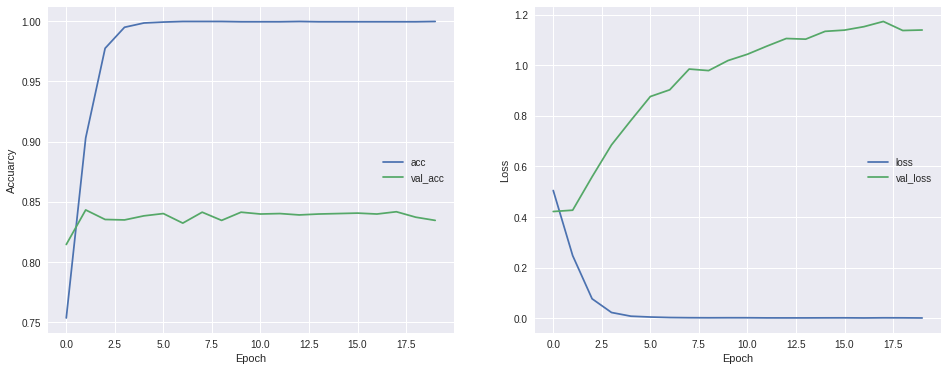

In [0]:
"""
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train History')
plt.ylabel('Accuarcy')
plt.xlabel('Epoch')
plt.legend(['acc', 'val_acc'], loc='right')
plt.show()
"""

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(16,6))

axL.plot(history.history['acc'])
axL.plot(history.history['val_acc'])
axL.set_xlabel('Epoch')
axL.set_ylabel('Accuarcy')
axL.legend(['acc', 'val_acc'], loc='right')

axR.plot(history.history['loss'])
axR.plot(history.history['val_loss'])
axR.set_xlabel('Epoch')
axR.set_ylabel('Loss')
axR.legend(['loss', 'val_loss'], loc='right')

fig.show()

In [0]:
# Overfittingの対処

from keras.regularizers import l1, l2

input = Input(shape=(X_train.shape[1],), sparse=True)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
output = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(x)

model = Model(inputs=[input], outputs=[output])

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=64, verbose=1, epochs=20, shuffle=True, validation_data=(X_test, y_test))

結論：


*   ディープランニング≯機械学習。ケースによって、選択しよう！
*   機械学習手法の中、XGBoostほぼ最強
*   トレーニングより、特徴処理かデータ処理の方がややこしいことが多い


# Appendix：Data処理方法（Feature Engineering）

## 定量化（Quantify）：文字→数値

[PPAP - ピコ太郎](https://www.youtube.com/watch?v=0E00Zuayv9Q)

In [0]:
lyrics = ["P-P-A-P", "I have a pen, I have a apple", "Uh! Apple Pen!", "I have a pen, I have pineapple", "Uh! Pineapple Pen!", "Apple Pen, Pineapple Pen", "Uh! Pen Pineapple Apple Pen", "Pen Pineapple Apple Pen"]
print("{}\n".format(lyrics))
for i, lyric in enumerate(lyrics):
  print("{}  {}".format(i, lyric))

['P-P-A-P', 'I have a pen, I have a apple', 'Uh! Apple Pen!', 'I have a pen, I have pineapple', 'Uh! Pineapple Pen!', 'Apple Pen, Pineapple Pen', 'Uh! Pen Pineapple Apple Pen', 'Pen Pineapple Apple Pen']

0  P-P-A-P
1  I have a pen, I have a apple
2  Uh! Apple Pen!
3  I have a pen, I have pineapple
4  Uh! Pineapple Pen!
5  Apple Pen, Pineapple Pen
6  Uh! Pen Pineapple Apple Pen
7  Pen Pineapple Apple Pen


In [0]:
# 単語単位で分ける
lyric_words = lyrics[1].split()
print("{}\n".format(lyric_words))
for i, word in enumerate(lyric_words):
  print("{}  {}".format(i, word))

['I', 'have', 'a', 'pen,', 'I', 'have', 'a', 'apple']

0  I
1  have
2  a
3  pen,
4  I
5  have
6  a
7  apple


In [0]:
# 正規化(Normalization)
# a~z & A~Z以外のcharをemptyに取り替える（けずる）
import re
regex = re.compile('[^a-zA-Z]')
regex.sub('', lyric_words[3])

'pen'

In [0]:
lyric_words[0].lower()

'i'

In [0]:
# 全ての単語が含まれる語彙集(Dictionary)作成
lyric_dict = []
for lyric in lyrics:
    lyric_dict = lyric_dict + lyric.split()
for i, word in enumerate(lyric_dict):
  lyric_dict[i] = regex.sub('', word)
  lyric_dict[i] = lyric_dict[i].lower()
print(lyric_dict)

['ppap', 'i', 'have', 'a', 'pen', 'i', 'have', 'a', 'apple', 'uh', 'apple', 'pen', 'i', 'have', 'a', 'pen', 'i', 'have', 'pineapple', 'uh', 'pineapple', 'pen', 'apple', 'pen', 'pineapple', 'pen', 'uh', 'pen', 'pineapple', 'apple', 'pen', 'pen', 'pineapple', 'apple', 'pen']


In [0]:
# 重複単語を削除
# listというtypeには、重複の要素はOK；setにはNG
lyric_dict = list(set(lyric_dict))
print(lyric_dict)

['ppap', 'pen', 'pineapple', 'i', 'a', 'uh', 'apple', 'have']


In [0]:
def wordArray(string, dic):
    words = string.split()
    for i, word in enumerate(words):
        words[i] = regex.sub('', word)
        words[i] = words[i].lower()
    array = [0] * len(dic)
    for word in words:
        for i, w in enumerate(dic):
            if word == w:
                array[i] = 1
                break
    return array

In [0]:
import pandas as pd

lyric_list = []
lyric_array_list = []
for lyric in lyrics:
  lyric_list.append(lyric)
  lyric_array_list.append(wordArray(lyric, lyric_dict))
lyric_dataframe = pd.DataFrame()
lyric_dataframe['lyric'] = lyric_list
lyric_dataframe['array'] = lyric_array_list
print(lyric_dict)
lyric_dataframe

['ppap', 'pen', 'pineapple', 'i', 'a', 'uh', 'apple', 'have']


,lyric,array
0,P-P-A-P,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,"I have a pen, I have a apple","[0, 1, 0, 1, 1, 0, 1, 1]"
2,Uh! Apple Pen!,"[0, 1, 0, 0, 0, 1, 1, 0]"
3,"I have a pen, I have pineapple","[0, 1, 1, 1, 1, 0, 0, 1]"
4,Uh! Pineapple Pen!,"[0, 1, 1, 0, 0, 1, 0, 0]"
5,"Apple Pen, Pineapple Pen","[0, 1, 1, 0, 0, 0, 1, 0]"
6,Uh! Pen Pineapple Apple Pen,"[0, 1, 1, 0, 0, 1, 1, 0]"
7,Pen Pineapple Apple Pen,"[0, 1, 1, 0, 0, 0, 1, 0]"


0, 1, 2, 3, ..., nではなく、0と1にしか変換しない理由は？

例:

i: 0

have: 10

ppap: 1000

直感的に/計算的に、各単語の重要性がppap>> have > iになってしまって、筋が通らない。

In [0]:
import numpy as np
lyric_matriz = np.array([np.array(lyric_array) for lyric_array in lyric_array_list])

In [0]:
lyric_matriz

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 1, 1],
       [0, 1, 0, 0, 0, 1, 1, 0],
       [0, 1, 1, 1, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 1, 0]])

In [0]:
lyric_matriz.shape

(8, 8)

### Scikit-Learn の特徴抽出ライブラリの利用

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [0]:
cv.fit(data.Comment)
print(cv.get_feature_names()[1000:1015])
print(len(cv.get_feature_names()))

['argue', 'argued', 'arguement', 'arguements', 'arguing', 'argument', 'arguments', 'aries', 'aristocracy', 'aritculett', 'arizona', 'arkan', 'arlington', 'arm', 'armando']
16469


In [0]:
sm_cv = cv.transform(data.Comment)
Y = data['Insult']

In [0]:
sm_cv.shape

(3947, 16469)

In [0]:
print(sm_cv[0])

  (0, 3409)	1
  (0, 5434)	1
  (0, 16397)	1
  (0, 16405)	1


In [0]:
indexs = sm_cv[0].nonzero()[1]
print("{}: {}\n{}: {}\n{}: {}\n{}: {}".format(indexs[0], cv.get_feature_names()[indexs[0]], indexs[1], cv.get_feature_names()[indexs[1]], indexs[2], cv.get_feature_names()[indexs[2]], indexs[3], cv.get_feature_names()[indexs[3]]))

3409: dad
5434: fuck
16397: you
16405: your


In [0]:
sm_cv[0].shape

(1, 16469)

In [0]:
print(data.Comment[10])
print(sm_cv[10])

# 単語の出現頻度まで見える！

"@jdstorm dont wish him injury but it happened on its OWN and i DOUBT he's injured, he looked embarrassed to me"
  (0, 806)	1
  (0, 2138)	1
  (0, 4089)	1
  (0, 4121)	1
  (0, 4456)	1
  (0, 6047)	1
  (0, 6130)	2
  (0, 6270)	1
  (0, 6819)	1
  (0, 6820)	1
  (0, 7048)	1
  (0, 7056)	1
  (0, 7135)	1
  (0, 7976)	1
  (0, 8316)	1
  (0, 10010)	1
  (0, 10203)	1
  (0, 14184)	1
  (0, 15505)	1


# 参考資料

画像など以外の出どころ（全部日本語ではありません）

1.   Materials by Jérémie Jakubowicz in 'introduction to machine learning and deep learning' workshop by Ecole Polytechnique and Kyoto University.
2.   https://github.com/Yorko/mlcourse.ai
3.   https://www.slideshare.net/tw_dsconf/ss-70083878
4.   http://www.bdpt.net/cn/2017/12/24/%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%EF%BC%9A%E5%8E%9F%E7%90%86%E7%AE%80%E6%98%8E%E6%95%99%E7%A8%8B09-%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%E6%8D%9F%E5%A4%B1%E5%87%BD%E6%95%B0/

